## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

### EVALUACIÓN DEL MODELO

#### Entre los tres modelos calculados, seleccionaría el 3 porque es el que tiene menor AIC y BIC. Sin embargo, AIC y BIC me permite elegir entre varios modelos, pero es un criterio que no da información sobre qué tan bueno es el modelo en sí.
#### Para determinar esto voy a hacer un análisis de los residuos:

In [64]:
resid = result_3.resid
resid_norm = (resid-resid.mean())/resid.std()

In [65]:
def get_resid_info(residual, bins):
    # Normalize residual
    resid = residual
    resid_norm = (resid-resid.mean())/resid.std()

    print(f"RESIDUALS STATISTICS \n {resid.describe()}")

    #Plot
    fig, ax = plt.subplots(2,3,figsize=(15,10))
    resid.plot(ax=ax[0,0])
    ax[0,0].set_title('Residuals')
    sm.qqplot(resid_norm, scale=1, line="45", ax=ax[0,1])
    ax[0,1].set_title('QQ Plot of Normalized Residuals')
    sm.graphics.tsa.plot_acf(resid, ax=ax[0,2])
    sns.histplot(resid_norm, bins=bins, ax=ax[1,0])
    ax[1,0].set_title(f'Histogram {bins} bins (normalized Residuals)')
    sns.boxplot(resid_norm, ax=ax[1,1])
    ax[1,1].set_title('Normalized Residuals Box Plot')
    plt.delaxes(ax[1][2])
    plt.tight_layout()
    plt.show()
    return

RESIDUALS STATISTICS 
 count      1062.000000
mean       1111.982110
std       26466.134724
min      -75582.270477
25%       -3336.789945
50%         184.953576
75%        3905.992021
max      754134.000000
dtype: float64


/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


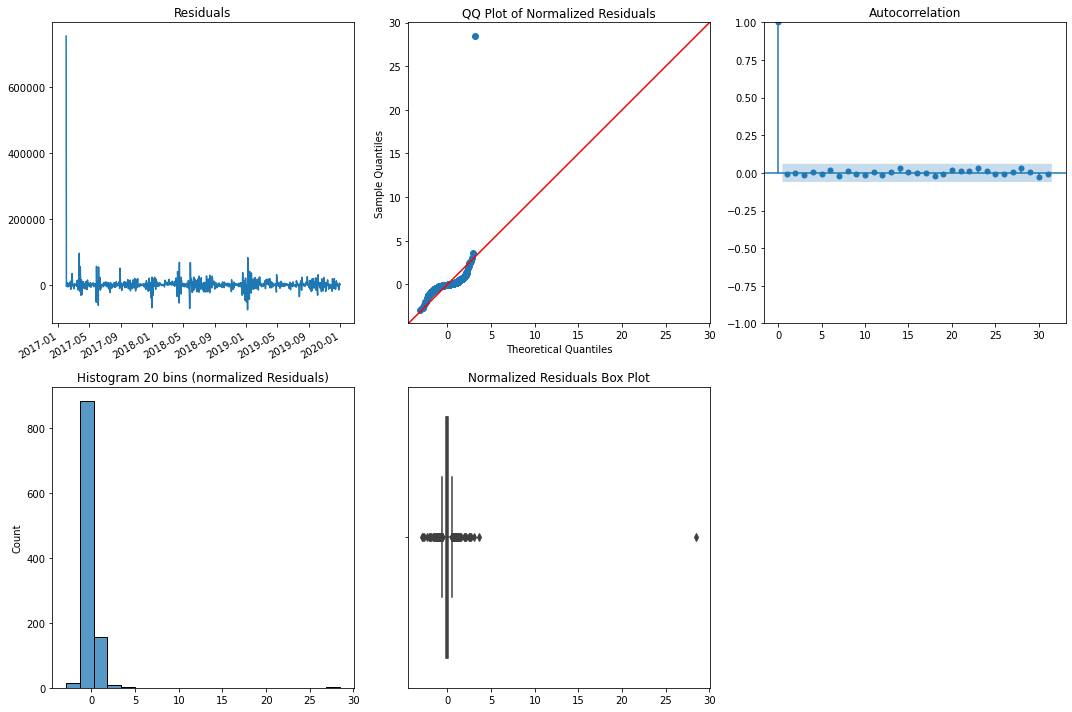

In [66]:
get_resid_info(result_3.resid, 20)

#### Pruebo eliminando de los residuos el primer punto

RESIDUALS STATISTICS 
 count     1061.000000
mean       402.253535
std      12871.187659
min     -75582.270477
25%      -3343.153123
50%        183.381929
75%       3898.633916
max      95619.636563
dtype: float64


/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


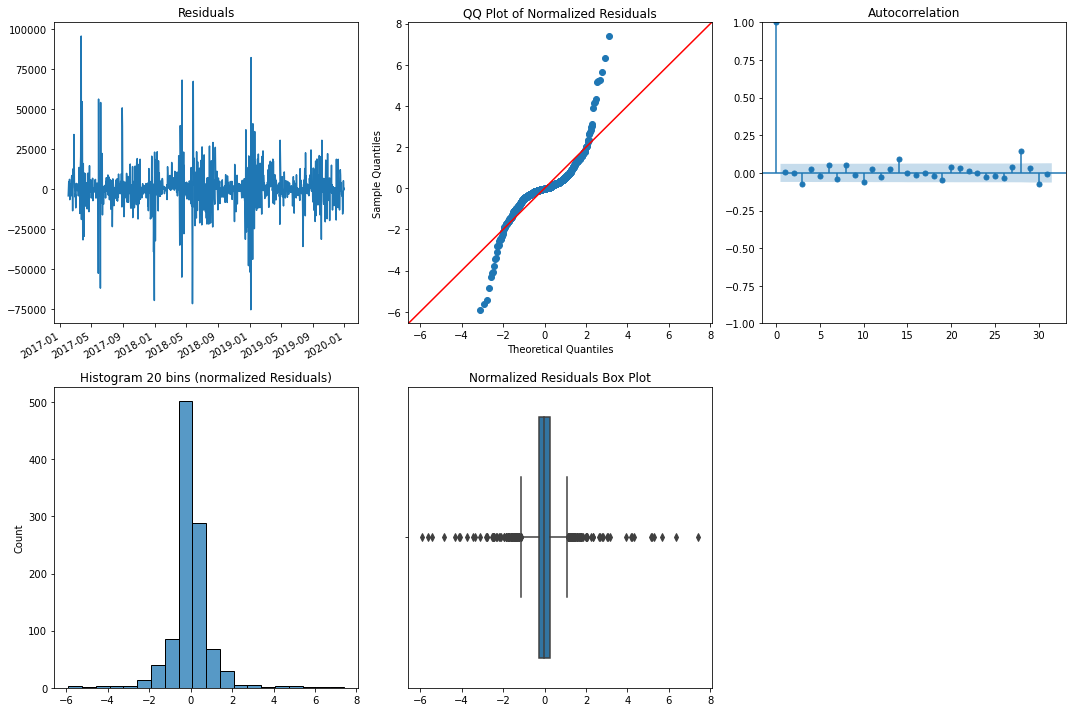

In [67]:
get_resid_info(result_3.resid[1:1062], 20)